In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv("./dataset_drugs/drugsComTrain_raw.tsv", sep='\t')

In [3]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
df_train['condition'].str.contains('Diabetes').value_counts()

False    157689
True       2709
Name: condition, dtype: int64

In [5]:
df_train['condition'].str.contains('Diabetes').value_counts()[True]

2709

In [6]:
# Diabetes Data EDA

In [7]:
diabetesData = pd.read_csv("./dataset_diabetes/diabetic_data.csv", na_values=["?"])   
  # In the original dataset, the missing values were marked as "?". We replace the "?" with na values

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
pd.set_option('display.max_columns', None)   #allows you to see all column names
#pd.set_option('display.max_rows', None)    #allows you to see all row names
diabetesData.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [10]:
diabetesData.isnull().sum()  #shows count of missing values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [11]:
# Dealing with missing values
    
    # Fill some of the missing values with "Unknown"
diabetesData['race'] = diabetesData['race'].fillna("Unknown")
diabetesData['payer_code'] = diabetesData['payer_code'].fillna("Unknown")
diabetesData['medical_specialty'] = diabetesData['medical_specialty'].fillna("Unknown")
   
    # Drop the 'weight' column. Too many missing values
diabetesData = diabetesData.drop(['weight'], axis=1)   
   
    # Drop rows, where 'diag_1','diag_2', 'diag_3' have missing values. 
      # We chose to drop because there aren't that many rows with missing values so dropping
      # these rows would have a negligible impact on the signal for ML models
diabetesData = diabetesData[diabetesData['diag_1'].notnull()]
diabetesData = diabetesData[diabetesData['diag_2'].notnull()]
diabetesData = diabetesData[diabetesData['diag_3'].notnull()]

In [12]:
diabetesData.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [13]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100244 entries, 1 to 101765
Data columns (total 49 columns):
encounter_id                100244 non-null int64
patient_nbr                 100244 non-null int64
race                        100244 non-null object
gender                      100244 non-null object
age                         100244 non-null object
admission_type_id           100244 non-null int64
discharge_disposition_id    100244 non-null int64
admission_source_id         100244 non-null int64
time_in_hospital            100244 non-null int64
payer_code                  100244 non-null object
medical_specialty           100244 non-null object
num_lab_procedures          100244 non-null int64
num_procedures              100244 non-null int64
num_medications             100244 non-null int64
number_outpatient           100244 non-null int64
number_emergency            100244 non-null int64
number_inpatient            100244 non-null int64
diag_1                      100244

In [22]:
# EDA 
   
diabetesData['gender'].value_counts()

Female             53922
Male               46319
Unknown/Invalid        3
Name: gender, dtype: int64

In [30]:
diabetesData['readmitted'].value_counts()

NO     53821
>30    35173
<30    11250
Name: readmitted, dtype: int64

In [32]:
 #Question: How many were readmitted within 30 days?

df_fig1 = pd.DataFrame(columns=['readmitted_within_30days','Count'])
df_fig1['readmitted_within_30days'] = ['Yes','No']
df_fig1['Count'] = [(11250), (35173+53821)]
df_fig1

,readmitted_within_30days,Count
0,Yes,11250
1,No,88994


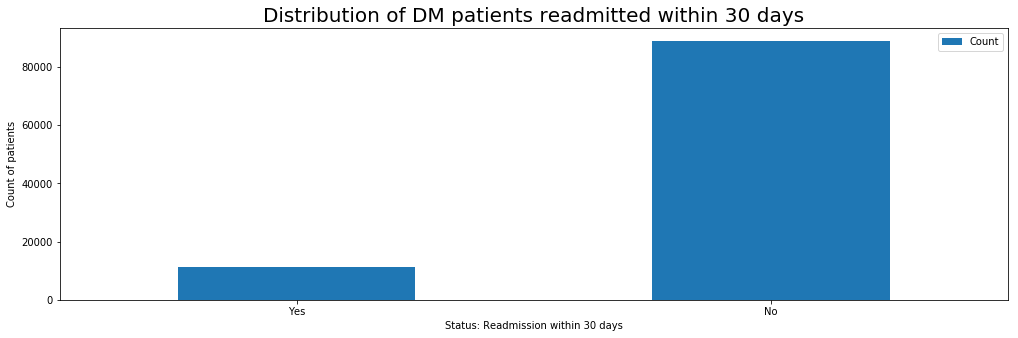

In [44]:
fig = df_fig1.plot(kind='bar', figsize=(17,5))
fig.set_title("Distribution of DM patients readmitted within 30 days", fontsize=20)
fig.set_xlabel("Status: Readmission within 30 days")
fig.set_ylabel("Count of patients")
plt.xticks([0,1],['Yes','No'],rotation='horizontal')
plt.savefig('./data_viz/fig1_readmitWithin30Days.png')

In [46]:
  #Question: What is the age distribution of patients in this dataset?
    
diabetesData['age'].value_counts()

[70-80)     25898
[60-70)     22288
[80-90)     17090
[50-60)     17044
[40-50)      9474
[30-40)      3616
[90-100)     2785
[20-30)      1515
[10-20)       469
[0-10)         65
Name: age, dtype: int64

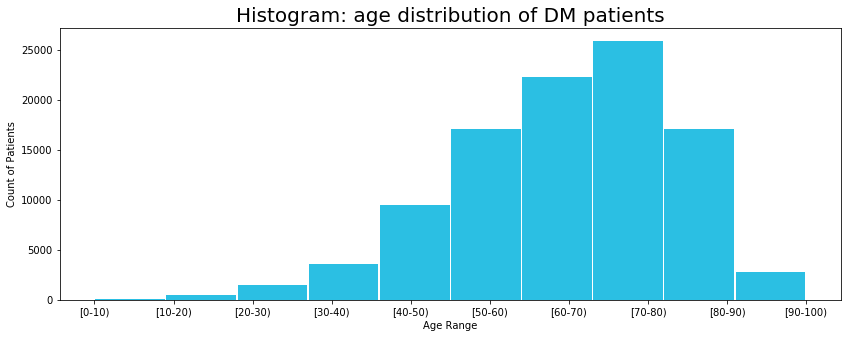

In [106]:
fig = diabetesData['age'].hist(bins=10,figsize=[14,5], 
                              color='#2BBFE3', 
                              rwidth=0.98,
                              grid=False)
fig.set_title("Histogram: age distribution of DM patients", fontsize=20)
fig.set_ylabel("Count of Patients")
fig.set_xlabel("Age Range")
plt.savefig('./data_viz/fig2_histogramAgeDistribution.png')

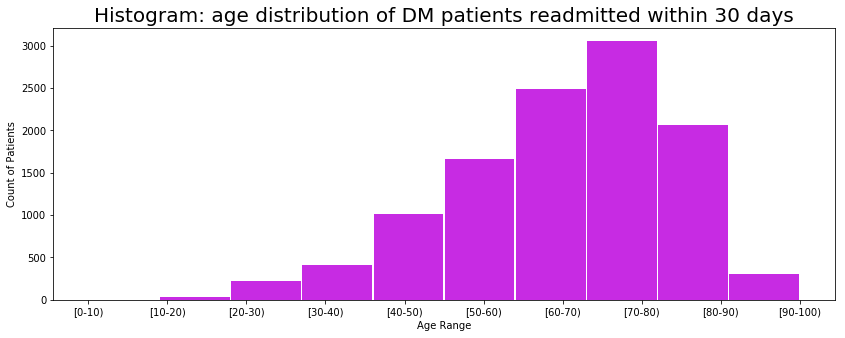

In [109]:
  # What is the age distribution of patients who were readmitted within 30 days?

df_fig3 = diabetesData.loc[diabetesData['readmitted'] == '<30']
fig = df_fig3['age'].hist(bins=10,figsize=[14,5], 
                              color='#C72BE3', 
                              rwidth=0.98,
                              grid=False)
fig.set_title("Histogram: age distribution of DM patients readmitted within 30 days", fontsize=20)
fig.set_ylabel("Count of Patients")
fig.set_xlabel("Age Range")
plt.savefig('./data_viz/fig3_histogramAgeDistributionWithin30Days.png')

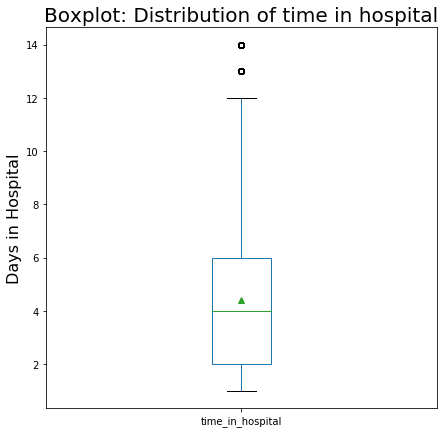

In [113]:
  # What is the mean and median days of DM patients spent in the hospital?
    
diabetesData.boxplot(column='time_in_hospital', figsize = (7,7), grid=False, showmeans = True)
plt.title('Boxplot: Distribution of time in hospital', size = 20)
plt.ylabel('Days in Hospital', size = 16)
plt.savefig('./data_viz/fig4_boxplotTimeInHospital.png')

In [68]:
diabetesData['time_in_hospital'].mean()

4.420274530146442

In [69]:
diabetesData['time_in_hospital'].median()

4.0

In [70]:
  # How is the data about DM patients distributed in terms of race? 
    
diabetesData['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Unknown             2191
Hispanic            1984
Other               1484
Asian                625
Name: race, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

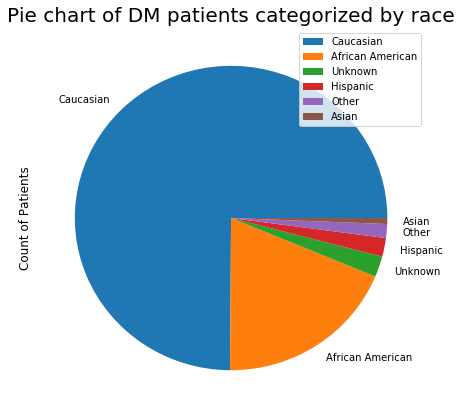

In [112]:
df = pd.DataFrame({'count': [75079, 18881, 2191, 1984, 1484, 625]},
                   index=['Caucasian', 'African American','Unknown','Hispanic','Other','Asian'])
fig = df.plot.pie(y='count', figsize=(7, 7))
plt.title('Pie chart of DM patients categorized by race', size = 20)
plt.ylabel('Count of Patients', size = 12)
fig.savefig('./data_viz/fig5_pieChartRace.png')

In [107]:
diabetesData.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,Unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,Unknown,Unknown,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [108]:
  # What is the distribution of the top 5 sources of admission?

diabetesData['admission_source_id'].value_counts()

7     56799
1     29036
17     6683
4      3144
6      2144
2      1092
5       852
3       179
20      161
9       112
8        15
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [118]:
diabetesData['metformin'].value_counts()

No        80543
Steady    18092
Up         1045
Down        564
Name: metformin, dtype: int64

In [121]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100244 entries, 1 to 101765
Data columns (total 49 columns):
encounter_id                100244 non-null int64
patient_nbr                 100244 non-null int64
race                        100244 non-null object
gender                      100244 non-null object
age                         100244 non-null object
admission_type_id           100244 non-null int64
discharge_disposition_id    100244 non-null int64
admission_source_id         100244 non-null int64
time_in_hospital            100244 non-null int64
payer_code                  100244 non-null object
medical_specialty           100244 non-null object
num_lab_procedures          100244 non-null int64
num_procedures              100244 non-null int64
num_medications             100244 non-null int64
number_outpatient           100244 non-null int64
number_emergency            100244 non-null int64
number_inpatient            100244 non-null int64
diag_1                      100244

In [122]:
diabetesData['A1Cresult'].value_counts()  #For people without diabetes, the normal A1C range is 4-6%.

#If you have diabetes, you should have an A1C test at least twice each year to find out your long-term blood glucose control. The A1C test measures your average blood glucose during the previous 2-3 months, but especially during the previous month.

None    83645
>8       7877
Norm     4935
>7       3787
Name: A1Cresult, dtype: int64

In [138]:
  # For patients with uncontrollable DM and who are already prescribed medications, 
    #how did the change of medications affect the rate of readmission?
diabetesData.groupby(['diabetesMed','change','A1Cresult','readmitted']).size()

diabetesMed  change  A1Cresult  readmitted
No           No      >7         <30              66
                                >30             213
                                NO              456
                     >8         <30              70
                                >30             302
                                NO              406
                     None       <30            1995
                                >30            6346
                                NO            11989
                     Norm       <30             104
                                >30             309
                                NO              833
Yes          Ch      >7         <30             199
                                >30             703
                                NO             1023
                     >8         <30             540
                                >30            1883
                                NO             2793
                     

In [141]:
df_meds = pd.DataFrame()
df_meds['Change'] = ['Yes','No']
df_meds['countReadmittedWithin30'] = [540, 184]
df_meds['countReadmittedAfter30'] = [1883, 654]
df_meds

,Change,countReadmittedWithin30,countReadmittedAfter30
0,Yes,540,1883
1,No,184,654


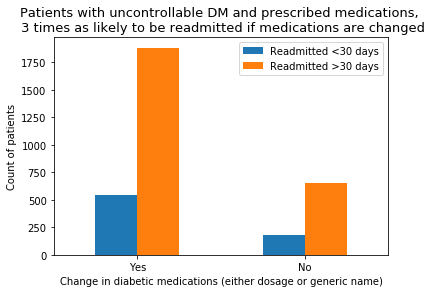

In [166]:
df_meds.plot.bar()
plt.title('Patients with uncontrollable DM and prescribed medications, \n 3 times as likely to be readmitted if medications are changed', size = 13)
plt.xlabel('Change in diabetic medications (either dosage or generic name)', size = 10)
plt.ylabel('Count of patients', size = 10)
plt.xticks([0,1],['Yes','No'],rotation='horizontal')
plt.legend(['Readmitted <30 days', 'Readmitted >30 days'],loc='upper right')
plt.savefig('./data_viz/fig6_uncontrollableDiabReadmit.png')